In [1]:
# Import library yang dibutuhkan
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
# Upload file kredensial API Kaggle
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anggamalikahmad","key":"dfad4b495a62fbfe30d73f07189347b7"}'}

In [3]:
# Install library Kaggle
!pip install -q kaggle

In [4]:
# Buat direktori untuk kredensial Kaggle
!mkdir ~/.kaggle

In [5]:
# Pindahkan kredensial API Kaggle ke direktori yang dibuat
!cp kaggle.json ~/.kaggle/

In [6]:
# Ubah permission file kredensial API Kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Download dataset
!kaggle competitions download -c ofa-ai-mastery-computer-vision

 99% 273M/276M [00:10<00:00, 31.6MB/s]
100% 276M/276M [00:10<00:00, 27.8MB/s]


In [8]:
# Ekstrak dataset
!unzip ofa-ai-mastery-computer-vision.zip

Archive:  ofa-ai-mastery-computer-vision.zip
  inflating: Sample_submission.csv   
  inflating: test/test/1.jpg         
  inflating: test/test/10.jpg        
  inflating: test/test/100.jpg       
  inflating: test/test/101.jpg       
  inflating: test/test/102.jpg       
  inflating: test/test/103.jpg       
  inflating: test/test/104.jpg       
  inflating: test/test/105.jpg       
  inflating: test/test/106.jpg       
  inflating: test/test/107.jpg       
  inflating: test/test/108.jpg       
  inflating: test/test/109.jpg       
  inflating: test/test/11.jpg        
  inflating: test/test/110.jpg       
  inflating: test/test/111.jpg       
  inflating: test/test/112.jpg       
  inflating: test/test/113.jpg       
  inflating: test/test/114.jpg       
  inflating: test/test/115.jpg       
  inflating: test/test/116.jpg       
  inflating: test/test/117.jpg       
  inflating: test/test/118.jpg       
  inflating: test/test/119.jpg       
  inflating: test/test/12.jpg        
  inf

In [9]:
# Persiapkan data latih dan data uji
train_dir = './train'
test_dir = './test'
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_dataset = train_datagen.flow_from_directory(directory=train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')
test_dataset = test_datagen.flow_from_directory(directory=test_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 2800 images belonging to 4 classes.
Found 729 images belonging to 1 classes.


In [10]:
# Buat model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [11]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Latih model
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
88/88 [==============================] - 322s 4s/step - loss: 1.3965 - accuracy: 0.3036 - val_loss: 5.9311 - val_accuracy: 0.0000e+00
Epoch 2/10
88/88 [==============================] - 310s 4s/step - loss: 1.3383 - accuracy: 0.3468 - val_loss: 5.6601 - val_accuracy: 0.0960
Epoch 3/10
88/88 [==============================] - 307s 3s/step - loss: 1.3029 - accuracy: 0.3939 - val_loss: 6.0897 - val_accuracy: 0.2593
Epoch 4/10
88/88 [==============================] - 332s 4s/step - loss: 1.2323 - accuracy: 0.4650 - val_loss: 6.5662 - val_accuracy: 0.1564
Epoch 5/10
88/88 [==============================] - 313s 4s/step - loss: 1.1893 - accuracy: 0.4775 - val_loss: 7.8511 - val_accuracy: 0.2826
Epoch 6/10
88/88 [==============================] - 306s 3s/step - loss: 1.1086 - accuracy: 0.5361 - val_loss: 7.8209 - val_accuracy: 0.2990
Epoch 7/10
88/88 [==============================] - 310s 4s/step - loss: 1.0527 - accuracy: 0.5614 - val_loss: 7.4178 - val_accuracy: 0.1276
Epoch 8/1

In [13]:
# Simpan model
model.save('animal_classification_model.h5')

**Visualisasi Data**

<Axes: xlabel='Name of class', ylabel='Number of samples'>

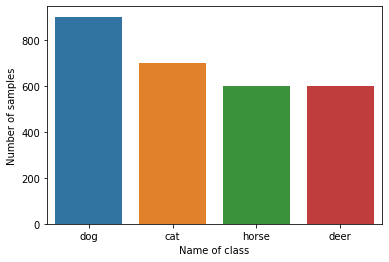

In [14]:
import os
import pandas as pd
import seaborn as sns

train_path = '/content/train'

# Inisialisasi list names dan nums
names = ['dog', 'cat', 'horse', 'deer']
nums = [900, 700, 600, 600]

# Loop untuk menghitung jumlah gambar pada setiap kelas
for i in os.listdir(train_path):
    nums.append(len(os.listdir(train_path+'/'+i)))
    names.append(i)

# Buat DataFrame dan plot bar chart
data = {'Name of class': names, 'Number of samples': nums}
df = pd.DataFrame(data)
sns.barplot(x='Name of class', y='Number of samples', data=df)

Karena saya di sini masih ragu dengan jumlah gambar di setiap folder dalam 'train_path' saya mencoba menghitung kembali dengan menggunakan fungsi 'len()'

In [15]:
import os

train_path = '/content/train'

names = []
nums = []
for i in os.listdir(train_path):
    if os.path.isdir(os.path.join(train_path, i)):
        names.append(i)
        nums.append(len(os.listdir(os.path.join(train_path, i))))
        
print(names)
print(nums)

['dog', 'cat', 'horse', 'deer']
[900, 700, 600, 600]


Menampilkan 25 gambar acak dari dataset dan menampilkan kelas masing-masing gambar:

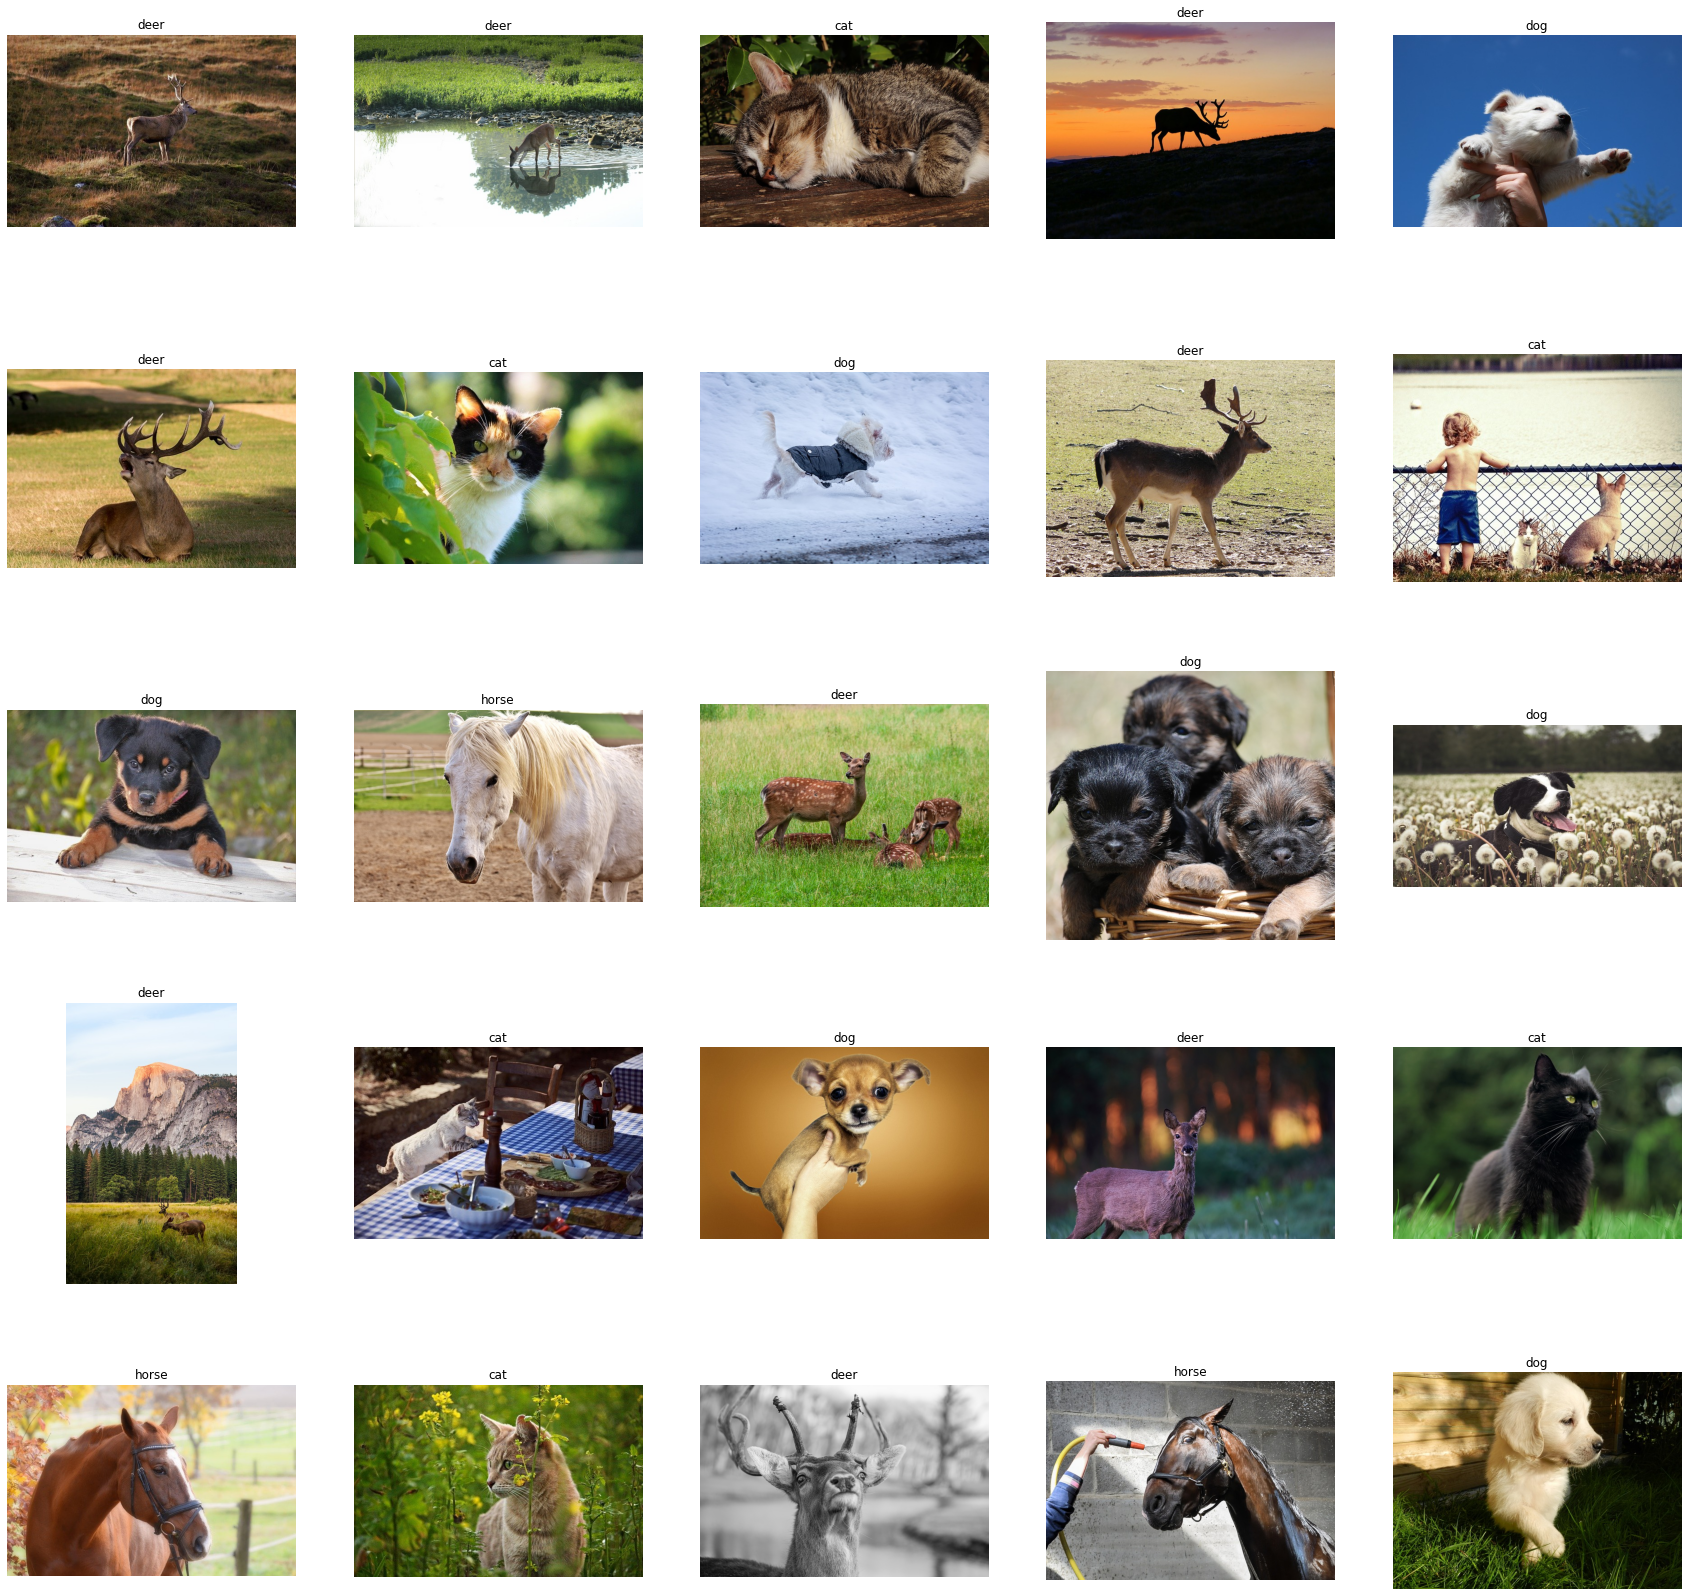

In [16]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# Set path ke dataset
path = "/content"

# Dapatkan nama kelas dari folder train
classes = os.listdir(path + "/train")

# Buat figure dengan ukuran 30x30
plt.figure(figsize=(30, 30))

# Loop untuk menampilkan 25 gambar acak dengan kelas yang sesuai
for x in range(25):
    # Dapatkan kelas acak
    i = random.randint(0, len(classes) - 1)
    
    # Dapatkan nama file gambar acak dari kelas i
    images = os.listdir(path + "/train/" + classes[i])
    
    # Dapatkan gambar acak dari kelas i
    j = random.randint(0, len(images) - 1)
    image = cv2.imread(path + "/train/" + classes[i] + "/" + images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Tampilkan gambar
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

# Tampilkan figure
plt.show()

**Preparing the data**

In [17]:
import tensorflow as tf

In [18]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
rescale = 1./255,
rotation_range = 20,
width_shift_range = 0.2,
height_shift_range = 0.2,
horizontal_flip = True,
validation_split = 0.2
)

In [19]:
train_generator = image_datagen.flow_from_directory(
directory = '/content/train',
target_size = (224, 224), # ukuran gambar yang diinginkan
batch_size = 32,
class_mode = 'categorical', # mode kelas untuk data multikelas
shuffle = True, # mengacak data setiap epoch
subset = 'training' # bagian dataset yang akan digunakan (train)
)

Found 2240 images belonging to 4 classes.


In [20]:
val_generator = image_datagen.flow_from_directory(
directory = '/content/train',
target_size = (224, 224), # ukuran gambar yang diinginkan
batch_size = 32,
class_mode = 'categorical', # mode kelas untuk data multikelas
shuffle = True, # mengacak data setiap epoch
subset = 'validation' # bagian dataset yang akan digunakan (validasi)
)

Found 560 images belonging to 4 classes.


**Building the model**

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
# definisi parameter augmentasi gambar
image_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2
)

In [23]:
# membuat generator untuk data train
train_generator = image_datagen.flow_from_directory(
    directory = '/content/train',
    target_size = (224, 224), # ukuran gambar yang diinginkan
    batch_size = 32,
    class_mode = 'categorical'
)

Found 2800 images belonging to 4 classes.


In [24]:
# membuat generator untuk data validasi
val_generator = image_datagen.flow_from_directory(
    directory = '/content/train',
    target_size = (224, 224), # ukuran gambar yang diinginkan
    batch_size = 32,
    class_mode = 'categorical', # mode kelas untuk data multikelas
    shuffle = True, # mengacak data setiap epoch
    subset = 'validation' # bagian dataset yang akan digunakan (validasi)
)

Found 560 images belonging to 4 classes.


In [25]:
# create the model
mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')

17225924/17225924 [==============================] - 1s 0us/step


In [26]:
model = Sequential()

In [27]:
model.add(mobilenet)

In [28]:
model.add(GlobalAveragePooling2D())

In [29]:
model.add(Flatten())

In [30]:
model.add(Dense(1024, activation="relu"))

In [31]:
model.add(Dense(512, activation="relu"))

In [32]:
model.add(Dense(4, activation="softmax" , name="classification"))

In [33]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 4)                

**Training and evaluating**

In [71]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [72]:
# load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [73]:
# normalize the pixel values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [74]:
# create a neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [75]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [76]:
# train the model
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2577 - accuracy: 0.9260
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1126 - accuracy: 0.9668
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0777 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0582 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0453 - accuracy: 0.9858


In [77]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 1s - loss: 0.0827 - accuracy: 0.9770 - 522ms/epoch - 2ms/step
Test accuracy: 0.9769999980926514


313/313 [==============================] - 1s 1ms/step


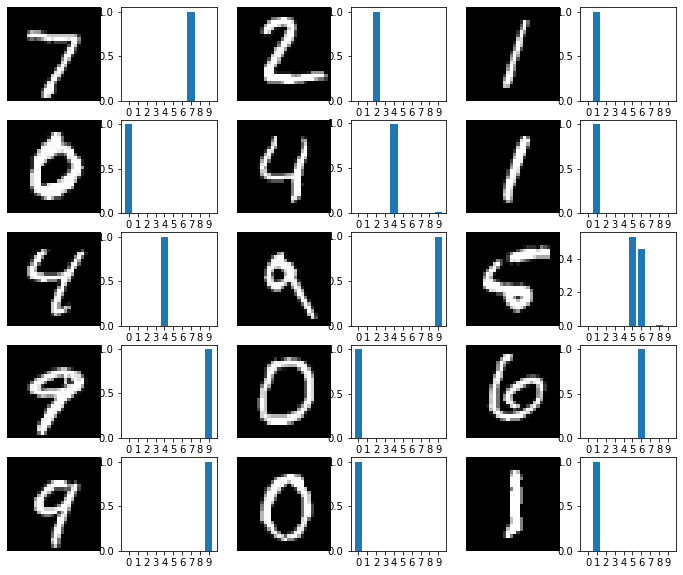

In [78]:
# plot the test set predictions
predictions = model.predict(X_test)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))
plt.show()

Plot diatas menampilkan 15 gambar dari data test set dan prediksi model untuk setiap gambar. Bagian kiri setiap gambar menunjukkan gambar asli dari data test set, sedangkan bagian kanan menunjukkan distribusi probabilitas dari masing-masing kelas yang dihasilkan oleh model.

**Preparing for submission**

In [79]:
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

In [80]:
model = load_model("animal_classification_model.h5")
sub_csv = 'Sample_submission.csv'
path_test = 'test/test'

In [81]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']

In [82]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [83]:
from keras.preprocessing import image
import numpy as np

labels = []
for i in image_id:
    # load image and resize it
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    # convert image to numpy array
    img = img_to_array(image)
    # scale pixel values to [0, 1]
    img = img / 255.0
    # reshape the array
    img = np.expand_dims(img, axis=0)
    # make prediction
    label = model.predict(img)
    # get index of the label with highest probability
    label_id = np.argmax(label)
    labels.append(label_id)


1/1 [==============================] - 0s 49ms/step


In [84]:
df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,2
7,8,2
8,9,3
9,10,2


In [85]:
# create submission dataframe
submission_df = pd.DataFrame({
    "ID": image_id,
    "Label": labels
})

In [86]:
# save dataframe to CSV file
submission_df.to_csv("submission_file.csv", index=False)